PROJECT OVERVIEW

Project Goal

This project aims to analyse movie datasest to generate insights on which movie genres perform best overall, whether higher production budget results to higher revenue and whether movies released at a certain time of the year perform better.

The datasets used for analysis were obtained from The Movie Database and IMDb

BUSINESS PROBLEM

Many big compaies are creating original video content. Our company would similarly like to venture into the movie-making space. We have conduced analysis to determine which movies and genres perform best at the box office so as to determnine what type of movies to make.

Importing the necessary libraries


In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Exploratory Data Analysis

In [3]:
#viewing the tmdb movies data
tm_df = pd.read_csv(r"C:\Users\This pc\Documents\moringa_labs\phase-2\Phase2-project\datasets\tmdb.movies.csv")
tm_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
tm_df.shape

(26517, 10)

In [5]:
tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
tm_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [7]:
#checking for duplicates
tm_df.duplicated().sum()

0

In [8]:
#checking for null values
tm_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [9]:
#viewimng the tn movie budgets dataset
tn_df = pd.read_csv(r"C:\Users\This pc\Documents\moringa_labs\phase-2\Phase2-project\datasets\tn.movie_budgets.csv")
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
tn_df.shape

(5782, 6)

In [11]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
#checking for duplicates
tn_df.duplicated().sum()

0

In [13]:
#checking for null values
tn_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [14]:
#removing symbols from productionbudget, doemstic_gross and worldwide_gross columns
tn_df["production_budget"]=tn_df["production_budget"].str.replace('[$,]','',regex=True)
tn_df["worldwide_gross"]=tn_df["worldwide_gross"].str.replace('[$,]','',regex=True)
tn_df["domestic_gross"]=tn_df["domestic_gross"].str.replace('[$,]','',regex=True)


In [15]:
cols = ["production_budget","domestic_gross","worldwide_gross"]

tn_df[cols] = (
    tn_df[cols].apply(lambda col: pd.to_numeric(
        col.astype(str).str.replace(r'[^0-9]', '', regex=True),
        errors='coerce'      
    ).astype("Int64"))       
)


In [16]:
#confriming that the columns have been converted to integers
tn_df.dtypes


id                    int64
release_date         object
movie                object
production_budget     Int64
domestic_gross        Int64
worldwide_gross       Int64
dtype: object

In [17]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [18]:
def hypothesis_test(h0,h1,p_value,alpha=0.05):
    if p_value < alpha:
        print(f"Reject H0 → {H1}")
    else:
        print(f"Fail to reject H1 → {H0}")

In [19]:
#formulating hypotheses to test whether higher production budget contributes to higher success of movies
H0 = "Production budget has no effect on the worldwide gross income."
H1 = "Production budget affects the worldwide gross income."

median_budget = tn_df["production_budget"].median()
tn_df["budget_category"] = tn_df["production_budget"].apply(lambda x: 'High' if x > median_budget else 'Low')
high_budget = tn_df[tn_df["budget_category"] == "High"]["worldwide_gross"] 
low_budget = tn_df[tn_df["budget_category"] == "Low"]["worldwide_gross"]

#conducting independent sample t-test
t_stat, p_value = ttest_ind(high_budget, low_budget, equal_var=False)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

hypothesis_test(H0, H1, p_value)

t-statistic: 31.994315103116556
p-value: 7.05291763260529e-195
Reject H0 → Production budget affects the worldwide gross income.


Interpretation of the t-test

A higher production budget results in a higher gross income. 

In [20]:
#Querying the IM database
#Establishin a connection to the database
conn = sqlite3.connect("../datasets/im.db")

In [21]:
#Getting the table names from the im database
query = """SELECT name FROM sqlite_master WHERE type = 'table';"""
name = pd.read_sql(query,conn)
name

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [22]:
ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [23]:
basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [24]:
#joining the tables into a single df
im_df = pd.read_sql("""
                    SELECT * 
                    FROM movie_ratings
                    JOIN movie_basics
                    ON movie_basics.movie_id = movie_ratings.movie_id;""", conn)
im_df

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


In [25]:
#checking for duplicates
im_df.duplicated().sum()

0

In [26]:
#checking for null values
im_df.isna().sum()

movie_id              0
averagerating         0
numvotes              0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [27]:
#dropping null values
im_df = im_df.dropna()

In [28]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   averagerating    65720 non-null  float64
 2   numvotes         65720 non-null  int64  
 3   movie_id         65720 non-null  object 
 4   primary_title    65720 non-null  object 
 5   original_title   65720 non-null  object 
 6   start_year       65720 non-null  int64  
 7   runtime_minutes  65720 non-null  float64
 8   genres           65720 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.0+ MB


In [29]:
im_df.head()

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [ ]:
#formulating hypotheses to test whether te genre affects movie rating
H0 = "All genres have equal ratings."
H1 = "The genre of a movie affects its rating."

In [31]:
#comparing ratings across genres using one-way ANOVA
test_genres = ["Action","Drama","Romance","Documentary","Adventure"]
ratings_by_genre = [im_df[im_df["genres"].str.contains(g)]["averagerating"] for g in test_genres]

f_stat, p_value = f_oneway(*ratings_by_genre)
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.4f}")
hypothesis_test(H0,H1,p_value)

F-statistic: 2471.034
p-value: 0.0000
Reject H0 → The genre of a movie affects its rating.


In [32]:
merged_df = pd.merge(tn_df, im_df,
         left_on="movie",
         right_on="primary_title",
         how="inner")

In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2752 non-null   int64  
 1   release_date       2752 non-null   object 
 2   movie              2752 non-null   object 
 3   production_budget  2752 non-null   Int64  
 4   domestic_gross     2752 non-null   Int64  
 5   worldwide_gross    2752 non-null   Int64  
 6   budget_category    2752 non-null   object 
 7   movie_id           2752 non-null   object 
 8   averagerating      2752 non-null   float64
 9   numvotes           2752 non-null   int64  
 10  movie_id           2752 non-null   object 
 11  primary_title      2752 non-null   object 
 12  original_title     2752 non-null   object 
 13  start_year         2752 non-null   int64  
 14  runtime_minutes    2752 non-null   float64
 15  genres             2752 non-null   object 
dtypes: Int64(3), float64(2),

In [34]:
#checking for duplicate column names
print(merged_df.columns.duplicated().any())


True


In [35]:
#removing duplicate column names
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]


In [36]:
#genres that generate highest revenue
top_genres = (
    merged_df
    .groupby("genres", as_index=False)[["domestic_gross", "worldwide_gross"]].mean()
    .sort_values(by=["worldwide_gross","domestic_gross"], ascending=False)
)
print(top_genres.head(10))

                            genres  domestic_gross  worldwide_gross
102          Adventure,Drama,Sport    4.007380e+08     1.272470e+09
283                Fantasy,Romance    4.007380e+08     1.272470e+09
274         Family,Fantasy,Musical    4.400357e+08     9.338154e+08
108              Adventure,Fantasy    1.928914e+08     7.012107e+08
13         Action,Adventure,Sci-Fi    2.203234e+08     5.991302e+08
282                Fantasy,Musical    1.670956e+08     5.127456e+08
101         Adventure,Drama,Sci-Fi    1.388172e+08     4.405503e+08
2       Action,Adventure,Animation    1.567252e+08     4.374047e+08
131  Biography,Documentary,History    1.810211e+08     4.299082e+08
113       Adventure,Mystery,Sci-Fi    1.264771e+08     4.024483e+08


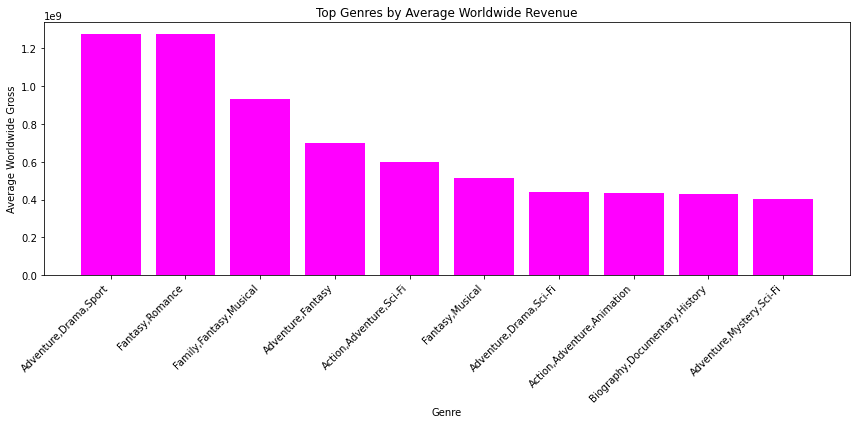

In [92]:
#plot to show top 10 movie genres
top_10_genres = top_genres.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_genres['genres'], top_10_genres['worldwide_gross'], color='magenta')
plt.xticks(rotation=45, ha='right')
plt.title("Top Genres by Average Worldwide Revenue")
plt.xlabel("Genre")
plt.ylabel("Average Worldwide Gross")
plt.tight_layout()
plt.show()

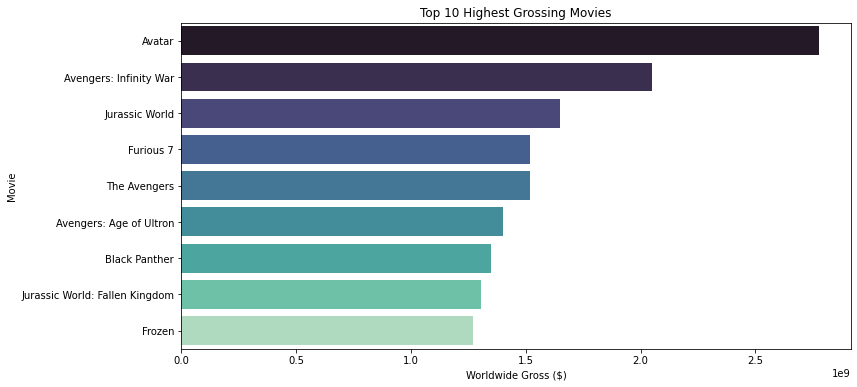

In [93]:
#Top 10 movies by revenue

merged_df = merged_df.sort_values('worldwide_gross', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='worldwide_gross', y='movie', data=merged_df, palette="mako")
plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Movie')
plt.show()


In [74]:
# Converting release_date to datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2752 non-null   int64         
 1   release_date       2752 non-null   datetime64[ns]
 2   movie              2752 non-null   object        
 3   production_budget  2752 non-null   Int64         
 4   domestic_gross     2752 non-null   Int64         
 5   worldwide_gross    2752 non-null   Int64         
 6   budget_category    2752 non-null   object        
 7   movie_id           2752 non-null   object        
 8   averagerating      2752 non-null   float64       
 9   numvotes           2752 non-null   int64         
 10  primary_title      2752 non-null   object        
 11  original_title     2752 non-null   object        
 12  start_year         2752 non-null   int64         
 13  runtime_minutes    2752 non-null   float64       
 14  genres  

In [ ]:
#extracting release month from release_date column
merged_df['release_month'] = merged_df['release_date'].dt.month_name()

In [86]:
avg_rating_by_month = merged_df.groupby('release_month', as_index=False)['averagerating'].mean()

# Sort months in calendar order
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
avg_rating_by_month['release_month'] = pd.Categorical(avg_rating_by_month['release_month'], categories=months_order, ordered=True)
avg_rating_by_month = avg_rating_by_month.sort_values('release_month')

print(avg_rating_by_month)


  release_month  averagerating
2      February           7.30
0         April           7.85
4           May           7.70
3          June           6.60
5      November           5.80
1      December           6.10


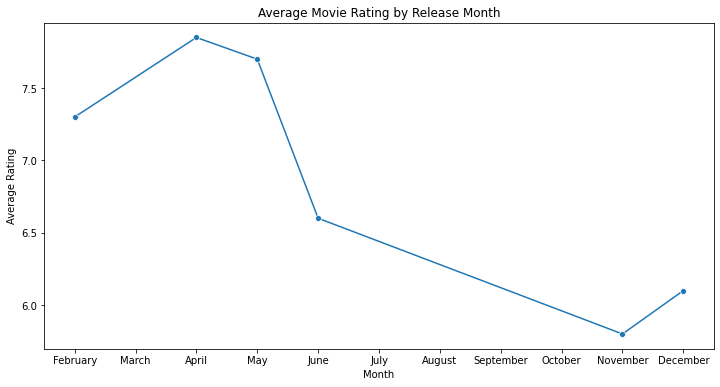

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rating_by_month, x='release_month', y='averagerating', marker='o')
plt.title("Average Movie Rating by Release Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.show()